In [ ]:
!pip3 install news-please
!pip3 install plotly
!pip3 install kaleido

In [1]:
import pandas as pd #
import requests
import time
import newsplease
from tqdm import tqdm
import json
import os
from urllib.parse import urlparse
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
# load categorised data by media ideological affiliation
df = pd.read_csv('C:/Users/analo/OneDrive - University of Glasgow/University of Glasgow/Amsterdam Visit/ASCoR-Project/Data Files/finalcorpus.csv', encoding='latin-1')
df.head()  

,date,maintext,title,source,media_name,ideology,Congress
0,2015/02/13,Advertisement\r\r\nIn honor of our 95 annivers...,6 Ways the League of Women Voters Has Impacted...,http://www.huffingtonpost.com/elisabeth-macnam...,Huffington Post,left,114th
1,2015/02/10,"As state legislatures shift into high gear, ma...",Opportunities for Effective Election Reforms C...,http://www.huffingtonpost.com/robert-m-brandon...,Huffington Post,left,114th
2,2015/02/22,"FILE - In a Tuesday, Nov. 4, 2014 file photo, ...","Scott Walker Pushes ALEC 'Right to Work' Bill,...",http://www.huffingtonpost.com/mary-bottari/sco...,Huffington Post,left,114th
3,2015/02/25,Former Ohio Gov. Ted Strickland (D) announced ...,Ted Strickland Announces He's Running For The ...,http://www.huffingtonpost.com/2015/02/25/ted-s...,Huffington Post,left,114th
4,2015/02/26,Nevada Senate Minority Leader Michael Roberson...,Nevada GOP Pushes New Gun Law Reminiscent Of '...,http://www.huffingtonpost.com/2015/02/26/nevad...,Huffington Post,left,114th


### Converting publish_date to datetime

In [3]:
# checking data type for publish_date variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        4467 non-null   object
 1   maintext    4467 non-null   object
 2   title       4462 non-null   object
 3   source      4467 non-null   object
 4   media_name  4467 non-null   object
 5   ideology    4467 non-null   object
 6   Congress    4467 non-null   object
dtypes: object(7)
memory usage: 244.4+ KB


In [4]:
# left_corpus.rename(columns={'publish_date': 'Date'}) #renaming date column
df['date'] = pd.to_datetime(df['date'], errors = 'coerce') # converting publish_date to datetime
df.head()

,date,maintext,title,source,media_name,ideology,Congress
0,2015-02-13,Advertisement\r\r\nIn honor of our 95 annivers...,6 Ways the League of Women Voters Has Impacted...,http://www.huffingtonpost.com/elisabeth-macnam...,Huffington Post,left,114th
1,2015-02-10,"As state legislatures shift into high gear, ma...",Opportunities for Effective Election Reforms C...,http://www.huffingtonpost.com/robert-m-brandon...,Huffington Post,left,114th
2,2015-02-22,"FILE - In a Tuesday, Nov. 4, 2014 file photo, ...","Scott Walker Pushes ALEC 'Right to Work' Bill,...",http://www.huffingtonpost.com/mary-bottari/sco...,Huffington Post,left,114th
3,2015-02-25,Former Ohio Gov. Ted Strickland (D) announced ...,Ted Strickland Announces He's Running For The ...,http://www.huffingtonpost.com/2015/02/25/ted-s...,Huffington Post,left,114th
4,2015-02-26,Nevada Senate Minority Leader Michael Roberson...,Nevada GOP Pushes New Gun Law Reminiscent Of '...,http://www.huffingtonpost.com/2015/02/26/nevad...,Huffington Post,left,114th


In [5]:
# Find and exlude articles without date, check how many stories are left
df['date'].isnull().sum()
df = df.loc[(~df['date'].isna())]
len(df)

4467

## Descriptive stats

In [6]:
# counting articles per Congress
domain = df['Congress'].value_counts()
pd.DataFrame(domain)

,Congress
117th,1520
116th,967
115th,804
114th,593
113th,583


<AxesSubplot:title={'center':'Articles per Congress'}, xlabel='Congress'>

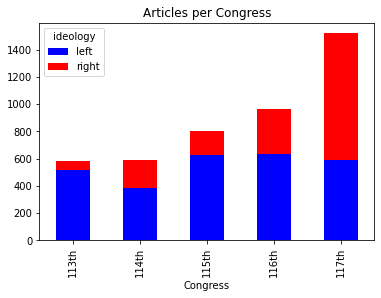

In [7]:
# Plotting articles per media outlet ideology and Congress
df.groupby(['Congress', 'ideology']).size().unstack().plot(kind='bar', color=('blue', 'red'), title="Articles per Congress", fontsize=10, stacked=True)

<AxesSubplot:title={'center':'Articles per News Media Ideology'}, xlabel='ideology'>

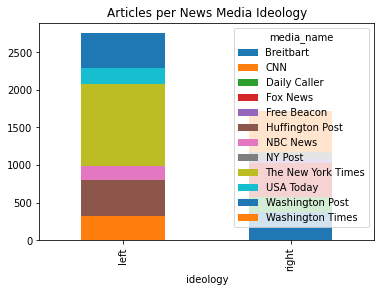

In [12]:
# Plotting media outlet stories by ideology
df.groupby(['ideology', 'media_name']).size().unstack().plot(kind='bar', title="Articles per News Media Ideology", fontsize=10, stacked=True)

### Plotting by time

In [8]:
df_dates = df.groupby('media_name').agg({'date': ['min', 'max']}).reset_index()
df_dates.columns = df_dates.columns.to_flat_index()
df_dates = df_dates.rename(columns={df_dates.columns[0]: "media_name",
                                      df_dates.columns[1]: "min_retrieved_date",
                                      df_dates.columns[2]: "max_retrieved_date"})

df_dates

,media_name,min_retrieved_date,max_retrieved_date
0,Breitbart,2013-02-11,2022-04-17
1,CNN,2013-01-18,2022-03-22
2,Daily Caller,2013-06-25,2022-03-04
3,Fox News,2013-03-27,2022-03-30
4,Free Beacon,2013-06-25,2022-01-23
5,Huffington Post,2013-02-08,2022-02-10
6,NBC News,2013-06-30,2022-03-22
7,NY Post,2013-06-26,2022-03-30
8,The New York Times,2013-01-11,2022-03-20
9,USA Today,2013-03-03,2021-09-14


In [10]:
# plotting by month
by_month = pd.to_datetime(df['date']).dt.to_period('M').value_counts().sort_index()
by_month.index = pd.PeriodIndex(by_month.index)
df_month = by_month.rename_axis('month').reset_index(name='counts')


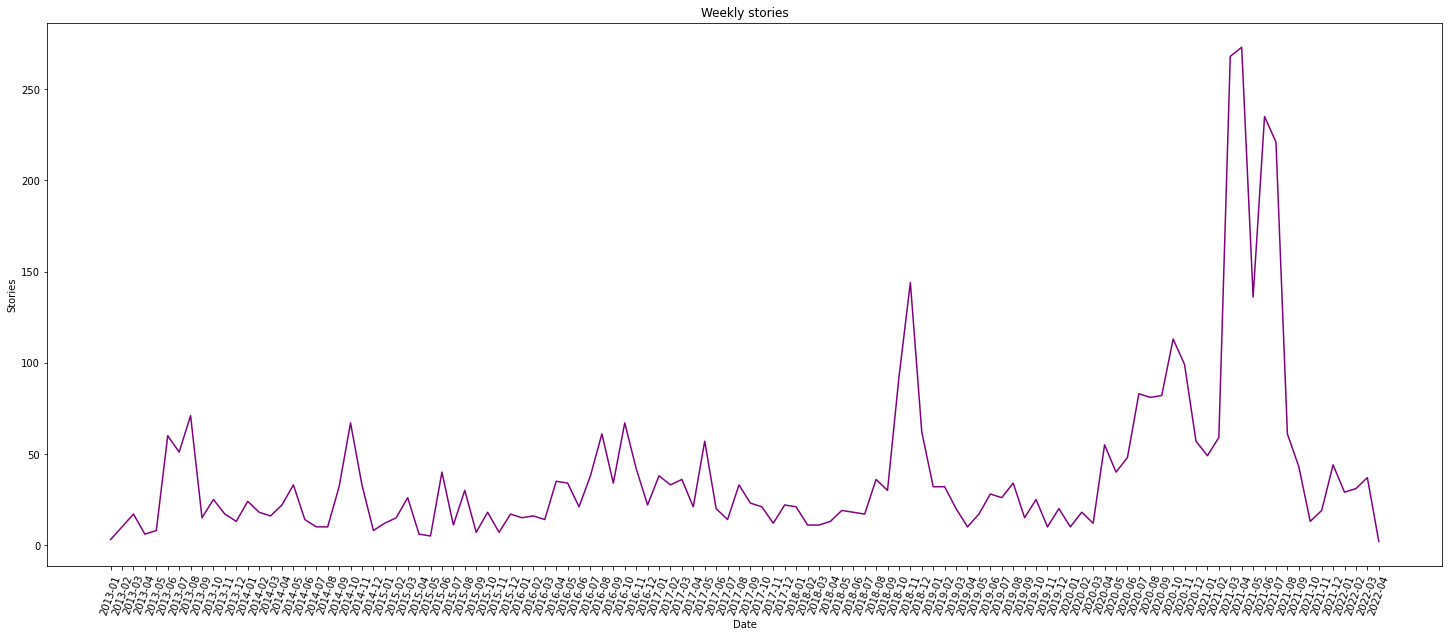

In [11]:
df_month['month'] = df_month['month'].astype('str')
# Create figure and plot space
fig, ax = plt.subplots(figsize=(25, 10))

# Add x-axis and y-axis
ax.plot(df_month['month'],
        df_month['counts'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Stories",
       title="Weekly stories")
plt.xticks(rotation=70)
plt.show()

In [12]:
# Plot by group
plotgroup = df.groupby(['ideology','date']).size().reset_index(name='counts')
plotgroup


,ideology,date,counts
0,left,2013-01-11,1
1,left,2013-01-18,1
2,left,2013-01-20,1
3,left,2013-02-03,1
4,left,2013-02-08,1
...,...,...,...
2251,right,2022-03-26,1
2252,right,2022-03-27,1
2253,right,2022-03-29,2
2254,right,2022-03-30,2


In [13]:
plotgroup['date'] = plotgroup['date'].astype('str')

<AxesSubplot:xlabel='date'>

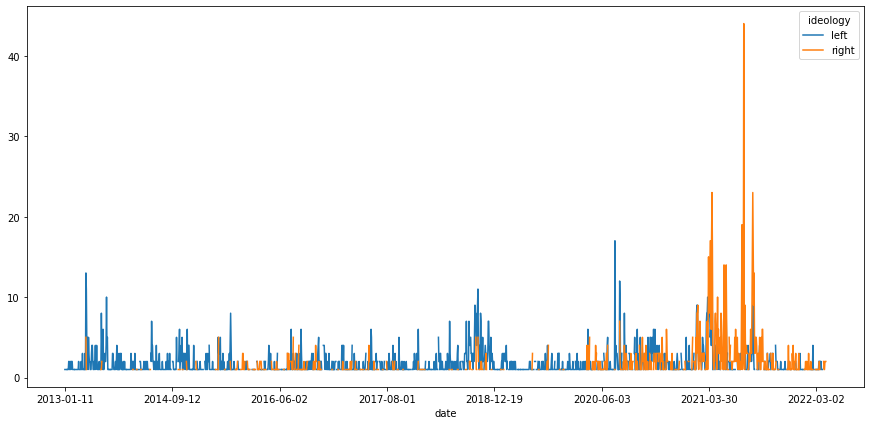

In [14]:
plt.rcParams["figure.figsize"] = (15,7)

pd.pivot_table(plotgroup.reset_index(),
               index='date', columns='ideology', values='counts'
              ).plot(subplots=False)

In [15]:
# Find and remove duplicates
df['exclude_dupe'] = df.duplicated(subset=['title', 'date'])

## Counting number of total words

In [16]:
from nltk.tokenize import word_tokenize
text =df['maintext'].apply(str) 
documents = [" ".join(strings.split()) for strings in text] 
string = " ".join(documents)
tokenized = word_tokenize(string)
len(tokenized)

6371235